In [1]:
import os
import numpy as np
import pandas as pd
import cv2
#import opendatasets as od

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow,show
from skimage.transform import resize

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [155]:
images_path =  os.path.join(os.getenv('HOME'), 'aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/')
import json

# 파일 열기
with open(os.path.join(images_path,"COCO_motorcycle (pixel).json"), "r") as f:
    # 파일 내용 읽기
    data = json.load(f)

for item in data:
    print(item)

info
licenses
images
annotations
categories


In [16]:
# 파일 내용 출력
print(data["info"])

{'description': 'This is dataset.', 'url': 'https://superannotate.ai', 'version': '1.0', 'year': 2022, 'contributor': 'Superannotate AI', 'date_created': '15/09/2022'}


In [47]:
print(data["images"][0])

{'id': 1, 'file_name': 'night ride (8).png', 'height': 1080, 'width': 1920, 'license': 1}


In [18]:
print(data["categories"])

[{'id': 1329681, 'name': 'Rider', 'supercategory': 'Rider', 'isthing': 1, 'color': [17, 74, 20]}, {'id': 1323885, 'name': 'My bike', 'supercategory': 'My bike', 'isthing': 1, 'color': [109, 51, 20]}, {'id': 1323884, 'name': 'Moveable', 'supercategory': 'Moveable', 'isthing': 1, 'color': [108, 51, 20]}, {'id': 1323882, 'name': 'Lane Mark', 'supercategory': 'Lane Mark', 'isthing': 1, 'color': [106, 51, 20]}, {'id': 1323881, 'name': 'Road', 'supercategory': 'Road', 'isthing': 1, 'color': [105, 51, 20]}, {'id': 1323880, 'name': 'Undrivable', 'supercategory': 'Undrivable', 'isthing': 1, 'color': [104, 51, 20]}]


In [43]:
# 클래스별 객체 수 출력

class_counts = {}
for annotation in data["annotations"]:
    class_id = annotation["category_id"]
    if class_id not in class_counts:
        class_counts[class_id] = 0
    class_counts[class_id] += 1

for class_id1, count in class_counts.items():
    for class_id2, category in enumerate(data['categories']):
        if category['id'] == class_id1:
            print(f"{category['name']}: {count}")

Undrivable: 200
Road: 200
Lane Mark: 207
Moveable: 1298
My bike: 200
Rider: 200


In [151]:
a1 = {}
for i in range(len(data["annotations"])):
    img_id = data["annotations"][i]['image_id']
    img_cat = data["annotations"][i]['category_id']
    
    if img_id not in a1:
        a1[img_id] = {img_cat: 1}
    else:
        if img_cat not in a1[img_id]:
            a1[img_id][img_cat] = 1
        else:
            a1[img_id][img_cat] += 1

In [152]:
for key, value in a1.items():
    print(key, value)

1 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
2 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
3 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 5, 1323885: 1, 1329681: 1}
4 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
5 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
6 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
7 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 8, 1323885: 1, 1329681: 1}
8 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
9 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 9, 1323885: 1, 1329681: 1}
10 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 6, 1323885: 1, 1329681: 1}
11 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 7, 1323885: 1, 1329681: 1}
12 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 10, 1323885: 1, 1329681: 1}
13 {1323880: 1, 1323881: 1, 1323882: 1, 1323884: 2, 1323885: 1, 1329681: 1}
14 {1323880: 1, 1323

In [148]:
# 딕셔너리 변환 작업
new_a1 = {}
for outer_key, inner_dict in a1.items():
    new_inner_dict = {}
    for num_key, value in inner_dict.items():
        for category in data["categories"]:
            if category['id'] == num_key:
                new_inner_dict[category['name']] = value
    new_a1[outer_key] = new_inner_dict

In [150]:
for key, value in new_a1.items():
    print(key, value)

1 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
2 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
3 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 5, 'My bike': 1, 'Rider': 1}
4 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
5 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
6 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
7 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 8, 'My bike': 1, 'Rider': 1}
8 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
9 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 9, 'My bike': 1, 'Rider': 1}
10 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 6, 'My bike': 1, 'Rider': 1}
11 {'Undrivable': 1, 'Road': 1, 'Lane Mark': 1, 'Moveable': 7, 'My bike': 1, 'Rider': 1}
12 {'Undrivable': 1, 'Road': 1

(1080, 1920, 3)


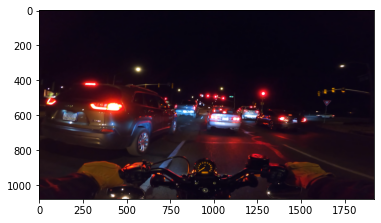

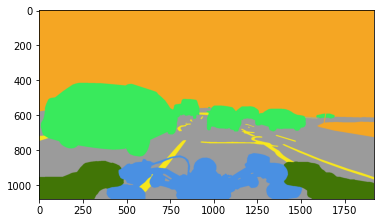

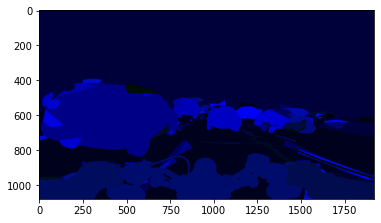

In [159]:
images_path =  os.path.join(os.getenv('HOME'), 'aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images')
img_name='/night ride (33).png'
img1 = images_path + img_name
img2 = images_path + img_name + '___fuse.png'
img3 = images_path + img_name + '___save.png'
test1 = cv2.imread(img1) 
test2 = cv2.imread(img2) 
test3 = cv2.imread(img3) 
print(test1.shape)

plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(test3, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image = list()
fuse = list()
blue = list()

for images in os.listdir(images_path):
    if images.find('___', 0) == -1:
        image.append(os.path.join(images_path, images))
        fuse.append(os.path.join(images_path, images + '___fuse.png'))
        blue.append(os.path.join(images_path, images + '___save.png'))

In [24]:
#리스트에 저장된 파일이 올바르게 정렬되어 있는지 확인
print(image[8])
print(fuse[8])
print(blue[8])

/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png
/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png___fuse.png
/aiffel/aiffel/dlthon/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (449).png___save.png


In [ ]:
#정렬이 안되어 있다면 실행
'''
sorted_filenames = sorted(filenames)

# Print the sorted list of filenames
print(sorted_filenames)
'''

In [6]:
image_size = (256, 256)
image_data = {'image': [], 'mask': [], 'blue': []}
classifications = ['image', 'mask', 'blue']

for (image_, mask_, blue_) in zip(image, fuse, blue):
    for i, img in enumerate([image_, mask_, blue_]):
        # PIL을 사용하여 이미지 열기
        img = Image.open(img)
        # 이미지 크기 조정
        img = img.resize(image_size)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        if img_array.shape[-1] == 4:  # 채널이(RGBA), RGB로 변환
               img_array = img_array[:, :, :3]
        #이미지 범위 0~1로 정규화
        img_array = img_array / 255.0
        # 이미지 배열을 해당 분류에 추가
        image_data[str(classifications[i])].append(img_array)

# 이미지 데이터 딕셔너리의 값들을 NumPy 배열로 변환
for classification in classifications:
    image_data[classification] = np.array(image_data[classification])

# 각 이미지 분류의 형태 출력
for classification in classifications:
    print(f"{classification} 이미지 형태:", image_data[classification].shape)

image 이미지 형태: (200, 256, 256, 3)
mask 이미지 형태: (200, 256, 256, 3)
blue 이미지 형태: (200, 256, 256, 3)


In [16]:
#데이터를 훈련 세트와 검증 세트, 평가 세트로 나눈다.
images = image_data['image']

#원본이미지
train_images_original= images[:140]
val_images_original = images[140:170]
test_images_original = images[170:200]

#fuse이미지
images = image_data['mask']
train_images_mask= images[:140]
val_images_mask= images[140:170]
test_images_mask = images[170:200]

#블루마스크 이미지
images = image_data['blue']
train_images_blue= images[:140]
val_images_blue= images[140:170]
test_images_blue = images[170:200]

In [17]:
len(test_images_blue)

30

In [60]:
#augmentation
import random

def augment(image,label,bluemask):
    
    value_list = [0, 1] #랜덤하게 augmentation을 하기위해 필요한 리스트
    seed = tf.random.uniform((), minval=0, maxval=1, dtype=tf.float32)
    seed_v = seed.numpy() #0~1사이의 값
    seed2 = tf.random.uniform((), minval=0, maxval=0.5, dtype=tf.float32)
    seed_v2 = seed2.numpy()#0~0.5 사이의 값
    
    #좌우뒤집기
    if random.choice(value_list) == 1:
        image = tf.image.flip_left_right(image)
        label = tf.image.flip_left_right(label)
        blue_mask = tf.image.flip_left_right(blue_mask)
        
    #밝기 조절
    if random.choice(value_list) == 1:
        image = tf.image.brightness(image, max_delta=seed_v2)
        image = tf.clip_by_value(image, 0, 1)
        label = tf.image.brightness(label, max_delta=seed_v2)
        label = tf.clip_by_value(label, 0, 1)
        blue_mask = tf.image.brightness(blue_mask, max_delta=seed_v2)
        blue_mask = tf.clip_by_value(blue_mask, 0, 1)
    
    #색조 조정
    if random.choice(value_list) == 1:
        image = tf.image.hue(image, max_delta=seed_v2)
        label = tf.image.hue(label, max_delta=seed_v2)
        blue_mask = tf.image.hue(blue_mask, max_delta=seed_v2)
        
    #중앙 기준으로 자르기
    if random.choice(value_list) == 1:
        tf.image.central_crop(image, central_fraction=seed_v)
        tf.image.central_crop(label, central_fraction=seed_v)
        tf.image.central_crop(blue_mask, central_fraction=seed_v)
        
    return image, label, bluemask